[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Figure 7.8

Analysis of hourly temperature data from 2015 at Manhattan (Kansas) and Versailles (Kentucky)\
Topics: Sample conditional mean, regression

Author: Carlos Fernandez-Granda\
Data source: https://www1.ncdc.noaa.gov/pub/data/uscrn/products/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

font_size = 15
font_size_ticks = 15

np.set_printoptions(precision=3)

file_name_temperature_2015 = "../data/weather/temperatures_2015.npy"
file_name_longitudes = "../data/weather/longitudes.npy"
file_name_latitudes = "../data/weather/latitudes.npy"

data_matrix = np.load(file_name_temperature_2015)

file_name_list = np.load('../data/weather/weather_station_names.npy')

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

In [5]:
stations = [55,100] 
station_names = []
for station in stations:
    name = process_name(file_name_list[station])
    station_names.append(name)
    print(name)

Versailles, KY
Corvallis, OR


In [7]:
def remove_faulty_measurements(data,verbose):
    min_val = -100 # We assume temperatures cannot be lower than -100
    for ind in range(len(data)):
        median = np.median(data[data > min_val])
        if data[ind] < min_val:
            if verbose:
                print(str(ind) + ": " + str(data[ind]))
            aux_ind = ind-1
            while aux_ind > 0:
                if data[aux_ind] > min_val:
                    data[ind] = data[aux_ind]
                    if verbose:
                        print("entry " + str(aux_ind) + " changed to " + str(data[ind]))
                    break
                else:
                    ind -= 1
    return data

station_1 = process_name(file_name_list[stations[0]+1])
station_2 = process_name(file_name_list[stations[1]+1])

verbose = False
temperature_1 = remove_faulty_measurements(data_matrix[:,stations[0]],verbose)
temperature_2 = remove_faulty_measurements(data_matrix[:,stations[1]],verbose)

Text(0.5, 1.0, 'Versailles, KY')

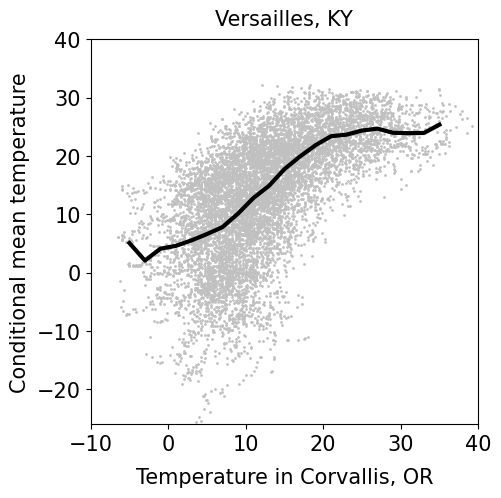

In [15]:
t_min = -5
t_max = 35
width_bin = 2
grid = np.arange(t_min, t_max+0.5,width_bin)
running_sum = np.zeros(len(grid))
counts = np.zeros(len(grid))
for i,val in enumerate(temperature_2):
    ind = int((val-t_min) / width_bin)
    if ind > len(grid)-1:
        ind = len(grid)-1
    running_sum[ind] += temperature_1[i]
    counts[ind] += 1
conditional_mean = running_sum / counts
    
xmin = -10
xmax = 40
ymin = -26
ymax = 40

markersize =1 
plt.figure(figsize=(5,5))
plt.scatter(temperature_2,temperature_1,s=markersize,color="silver",rasterized=True)
plt.plot(grid,conditional_mean,"-",lw=3,ms=5,color="black")
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([ymin,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Conditional mean temperature",fontsize=font_size,labelpad = 5)
plt.xlabel("Temperature in " + station_names[1],fontsize=font_size,labelpad = 10)
plt.title(station_names[0],fontsize=font_size,pad=10)